In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt


Definimos las constantes

In [2]:
# MACROS
NDATASETS = 5
NSAMPLES = 1
NLAMDAS = 40
SAMPLE_INDEX = 5

Creamos las listas que usaremos a la hora de generar los datos

In [3]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(NSAMPLES)] for i in range(NDATASETS)]

In [4]:
for i in range(NDATASETS):
    X, y = make_regression(n_samples=10000, n_features=1000, noise=700, n_informative=500)
    DataMatrix[i].extend((X, y))

In [5]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.6561, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))


In [6]:
listTrainSamples = np.logspace(6, 8, num=15, base=3)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[729.0,
 853.0,
 998.0,
 1167.0,
 1366.0,
 1598.0,
 1869.0,
 2187.0,
 2559.0,
 2993.0,
 3502.0,
 4097.0,
 4793.0,
 5608.0,
 6561.0]

In [7]:
el = listTrainSamples[SAMPLE_INDEX]

for i in range(NDATASETS):
    XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
    
    YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
    matrixXYtrainparts[i][0].extend((XtrainDivided, YtrainDivided))

In [8]:
alpha_dict ={'alpha':np.logspace(0, 5, num=NLAMDAS, base=10)}

<h1>Ridge Regression</h1>

In [9]:
ridge_regressors = []
#matrixRidgeResults =  [[[[]*2 for i in range(25)] for j in range(NSAMPLES)] for i in range(NDATASETS)]
matrixRidgeResults = np.zeros([NDATASETS,NSAMPLES,NLAMDAS,2])


# Creamos los diferentes ridge regressors
for alpha in alpha_dict.get('alpha'):
    ridge_regressors.append(Ridge(alpha=float(alpha)))


for i in range(NDATASETS):
    for j in range(1):
        for idx, ridge_regressor in enumerate(ridge_regressors):
            
            ridge_regressor.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = ridge_regressor.predict(matrixDatasetTraintest[i][1])
            
            #matrixRidgeResults[i][j][idx].extend((ridge_regressor.alpha, r2_score(matrixDatasetTraintest[i][3], y_pred)))
            matrixRidgeResults[i][j][idx][0] = ridge_regressor.alpha
            matrixRidgeResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)
            
            
            

In [10]:
np.save('matrixRidgeResults_Zoom', matrixRidgeResults)

In [11]:
matrixRidgeResults = np.load('matrixRidgeResults_Zoom.npy')

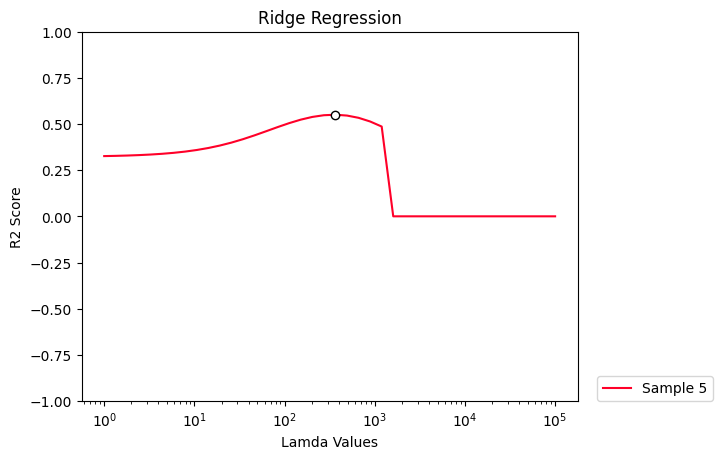

In [12]:
alphas = alpha_dict.get('alpha')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([NSAMPLES, NLAMDAS])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixRidgeResultsInvertida = np.zeros([NLAMDAS, NSAMPLES, 2])

num_dataset = 2

for i_sample in range(NSAMPLES):
    for i_alphavalue in range(25):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixRidgeResults[i_dataset][i_sample][i_alphavalue][1])
            MatrixRidgeResultsInvertida[i_alphavalue][i_sample][0] = matrixRidgeResults[i_dataset][i_sample][i_alphavalue][0]
            MatrixRidgeResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(NSAMPLES):
    for idx_alphavalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_alphavalue] = MatrixRidgeResultsInvertida[idx_alphavalue][idx_sample][1]


f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(NSAMPLES)])

plt.xscale('log')
plt.title("Ridge Regression")
plt.xlabel("Lamda Values")
plt.ylabel("R2 Score")
for i_sample in range(NSAMPLES):
    plt.plot(alphas, r2_scores[i_sample], label = "Sample " + str(SAMPLE_INDEX))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    plt.plot(alphas[i_maxValue], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0))
plt.show(f)

<h1> Lasso Regression </h1>


In [13]:
print(matrixXYtrainparts)

[[[array([[-0.5980842 ,  0.78094367, -0.95009868, ...,  0.30808231,
        -1.63243206,  1.51772129],
       [-1.11198084,  0.42528125, -0.47220629, ..., -1.55640398,
        -0.30674758, -1.26545407],
       [-1.11950782,  0.63833748,  0.26240535, ...,  0.0077113 ,
         0.44395332, -0.97859419],
       ...,
       [ 0.75136778, -1.15791002, -0.99170154, ..., -2.16061941,
        -0.15535583, -0.50406603],
       [-0.56555353, -0.81767817,  0.31417885, ...,  0.89222032,
         0.17993389, -1.15062402],
       [-0.85867551, -0.61219021, -0.66345694, ..., -0.19872658,
        -0.22722918,  1.80887961]]), array([ -285.23814457,  -432.49242678, -2386.85980089, ...,
        1435.26594331,  -561.52047382,  -539.73906209])]], [[array([[-0.81323057,  0.23529433,  0.0263916 , ...,  0.48101146,
         0.85044454, -0.3764849 ],
       [ 0.03814857, -0.61609593, -0.77067327, ..., -0.55167725,
         0.89843923,  0.05628498],
       [ 2.12709592,  0.38542397, -1.15191253, ...,  0.6813078

In [14]:
lasso_regressors = []
#matrixRidgeResults =  [[[[]*2 for i in range(25)] for j in range(NSAMPLES)] for i in range(NDATASETS)]
matrixLassoResults = np.zeros([NDATASETS,NSAMPLES,NLAMDAS,2])


# Creamos los diferentes ridge regressors
for alpha in alpha_dict.get('alpha'):
    lasso_regressors.append(Lasso(alpha=float(alpha)))


for i in range(NDATASETS):
    for j in range(1):
        for idx, lasso_regressor in enumerate(lasso_regressors):
            lasso_regressor.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = lasso_regressor.predict(matrixDatasetTraintest[i][1])
            
            matrixLassoResults[i][j][idx][0] = lasso_regressor.alpha
            matrixLassoResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

In [15]:
np.save('matrixLassoResults_Zoom', matrixLassoResults)

In [16]:
matrixLassoResults = np.load('matrixLassoResults_Zoom.npy')

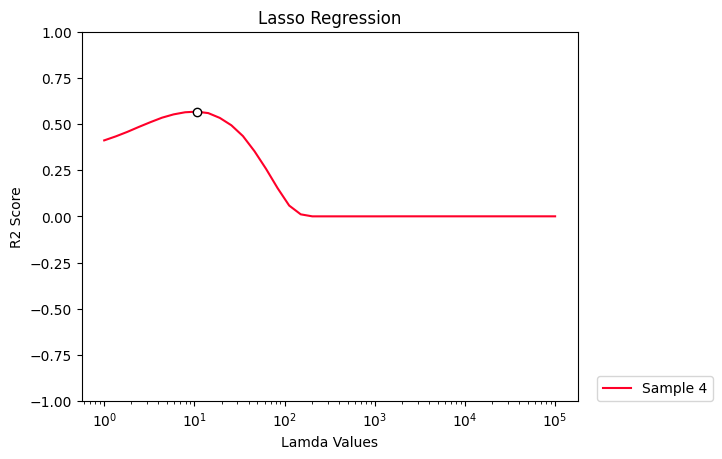

In [17]:
alphas = alpha_dict.get('alpha')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([NSAMPLES, NLAMDAS])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixLassoResultsInvertida = np.zeros([NLAMDAS, NSAMPLES, 2])

matrixXYtrainparts =  [[[]*2 for j in range(NSAMPLES)] for i in range(NDATASETS)]
num_dataset = 2

for i_sample in range(NSAMPLES):
    for i_alphavalue in range(25):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixLassoResults[i_dataset][i_sample][i_alphavalue][1])
            MatrixLassoResultsInvertida[i_alphavalue][i_sample][0] = matrixLassoResults[i_dataset][i_sample][i_alphavalue][0]
            MatrixLassoResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(NSAMPLES):
    for idx_alphavalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_alphavalue] = MatrixLassoResultsInvertida[idx_alphavalue][idx_sample][1]


f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(NSAMPLES)])

plt.xscale('log')
plt.title("Lasso Regression")
plt.xlabel("Lamda Values")
plt.ylabel("R2 Score")
for i_sample in range(NSAMPLES):
    plt.plot(alphas, r2_scores[i_sample], label = "Sample " + str(SAMPLE_INDEX-1))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    plt.plot(alphas[i_maxValue], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0))
plt.show(f)